In [10]:
import pandas as pd
import asyncpg
from config import DATABASE_URL
import matplotlib.pyplot as plt

In [31]:
pool = await asyncpg.create_pool(DATABASE_URL, ssl="require")
async with pool.acquire() as conn:
    results = await conn.fetch("SELECT * FROM players where osu_id IS NOT NULL;")
    columns = [desc for desc in results[0].keys()]
    # Convert to list of tuples to preserve numeric types
    data = [tuple(record) for record in results]
    df = pd.DataFrame(data, columns=columns)

print(df)

ValueError: entry not a 2- or 3- tuple

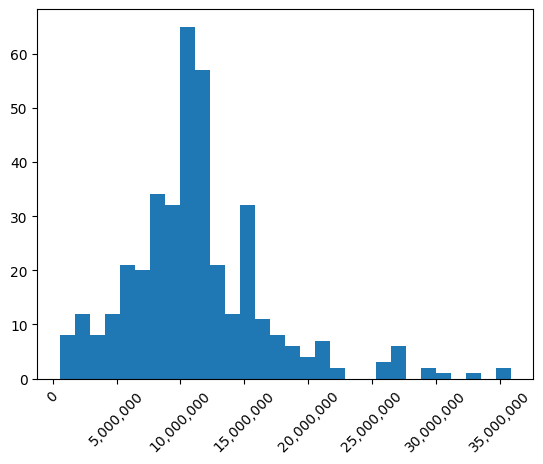

In [30]:
# plot the 2nd column in histogram with 30 bins x axis labels without scientific notation 1e7
plt.hist(df[1], bins=30)
plt.gca().get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ","))
)
plt.xticks(rotation=45)
plt.show()